## House Price Prediction Regression Project

## Project Goal

Predict the price of a house by its features. if you are buyer or seller of the house but you do not know the
exact price of the house,So supervise machine learning regression algorithm can help you to predict the price of the house just providing feature of the house 

## Load Modules/Libraries

In [1]:
#import following libraries using this command in anaconda prompt
"""
pip install numpy
pip install pandas
pip install matplotlib
pip install seaborn

"""
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar   
from   pandas.api.types import CategoricalDtype

from sklearn.preprocessing import StandardScaler

## load datasets

In [2]:
train_data_path = r"C:\Users\Paras\Desktop\house_price_prediction\Data\train.csv"
test_data_path = r"C:\Users\Paras\Desktop\house_price_prediction\Data\test.csv"


df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

print("Shape of df_train: ",df_train.shape)
print("Shape of df_test: ",df_test.shape)


Shape of df_train:  (1460, 81)
Shape of df_test:  (1459, 80)


In [3]:


pd.set_option("display.max_columns",None)

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
pd.set_option("display.max_columns",None)


In [6]:
df_test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Know Your data

## Data Integration

In [7]:
df = pd.concat([df_train,df_test])

print("Shape of Integrated Data/ DF:",df.shape)

Shape of Integrated Data/ DF: (2919, 81)


In [8]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [9]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


## Get the Breif Information about Datasets

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [11]:
int_features=df.select_dtypes(include=["int64"]).columns
print("Total number of integer feature :- " , int_features.shape[0])
print("Integer Feature namefs: ", int_features.tolist())



Total number of integer feature :-  26
Integer Feature namefs:  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [12]:
float_features=df.select_dtypes(include=["float64"]).columns
print("Total number of float feature :- " , float_features.shape[0])
print("float Feature names: ", float_features.tolist())

Total number of float feature :-  12
float Feature names:  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [13]:
cat_features=df.select_dtypes(include=["object"]).columns
print("Total number of categorial feature :- " , cat_features.shape[0])
print("Categorical Feature names: ", cat_features.tolist())

Total number of categorial feature :-  43
Categorical Feature names:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Get the Stastical information about Numerical Features

In [14]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## Handling Missing Value

## Visualise Null/Missing Value

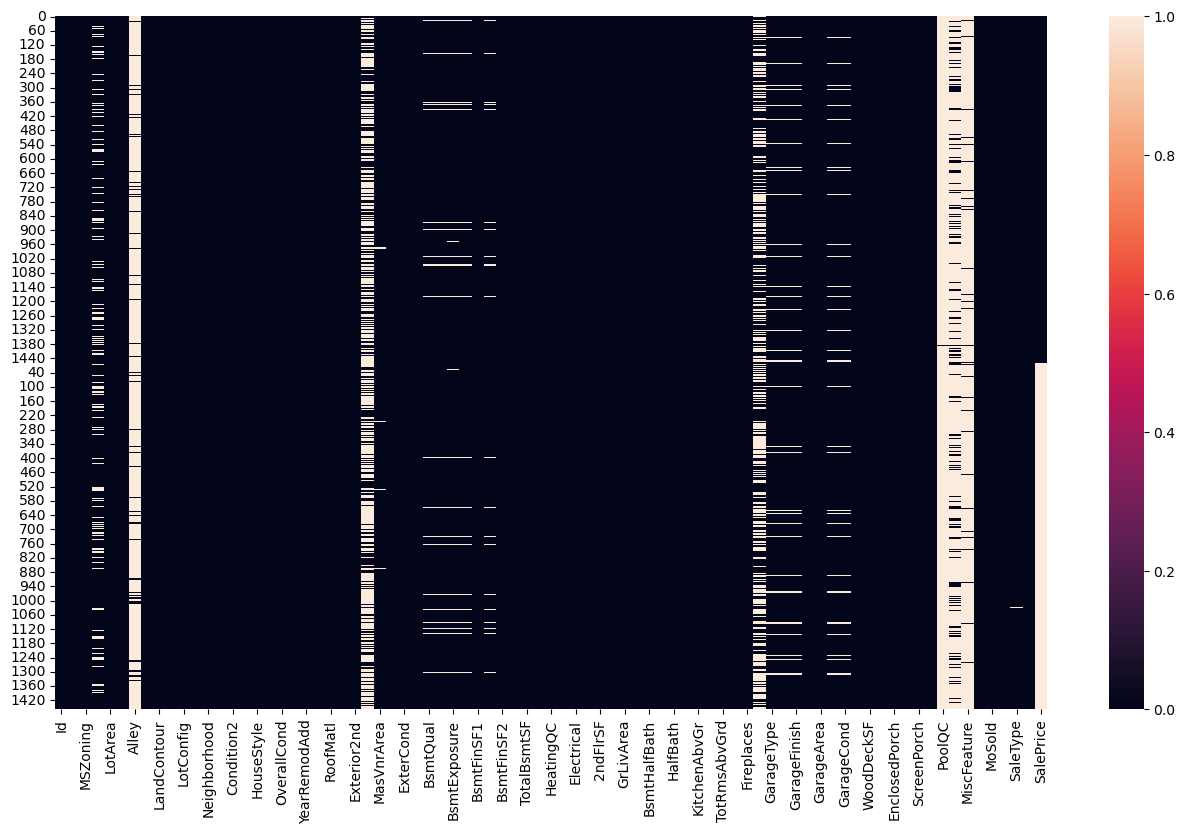

In [15]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_DF_of_null_values.png")

## Get the null value percentage for every feature

In [16]:
## set id column as index 
df=df.set_index("Id")

In [17]:
null_count= df.isnull().sum();
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

In [18]:
null_percent= df.isnull().sum()/df.shape[0]*100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 80, dtype: float64

## Drop Column / Feature 
As per observation we will not drop any features

In [19]:
"""As per Domain knowledge we will not drop those features , instead none value we will add const value  """
miss_value_50_perc = null_percent[null_percent > 50 ] 
miss_value_50_perc


Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [20]:
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [21]:
"""As per Domain knowledge we will not drop  FireplaceQu features , instead none value we will add const value """
miss_value_20_50_perc = null_percent[(null_percent > 20) & (null_percent <51)] 
miss_value_20_50_perc


FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [22]:
"""As per Domain knowledge we will not drop  FireplaceQu features , instead none value we will add const value """
miss_value_5_20_perc = null_percent[(null_percent > 5) & (null_percent <21)] 
miss_value_5_20_perc


LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [23]:
df["LotFrontage"].value_counts().head()

LotFrontage
60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: count, dtype: int64

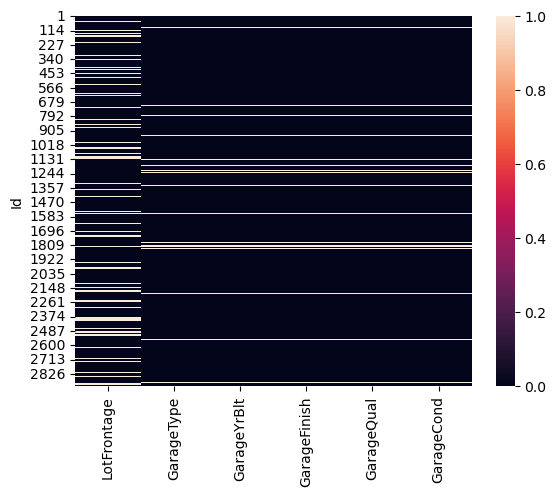

In [24]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull());

## Missing value Imputation
we add value in the empty space but not drop feature M



In [25]:
missing_value_feat = null_percent[null_percent > 0]
print("total missing value features =" ,len(missing_value_feat)) 


total missing value features = 35


In [26]:
missing_value_feat

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [27]:
cat_na_feat=missing_value_feat[missing_value_feat.keys().isin(cat_features)]
print("Total number of categorical missing features :- ",len(cat_na_feat))


Total number of categorical missing features :-  23


In [28]:
int_na_feat=missing_value_feat[missing_value_feat.keys().isin(int_features)]
print("Total number of integer missing features :- ",len(int_na_feat))

Total number of integer missing features :-  0


In [29]:
float_na_feat=missing_value_feat[missing_value_feat.keys().isin(float_features)]
print("Total number of float missing features :- ",len(float_na_feat))

Total number of float missing features :-  12


## Handing MSZoning = 0.137033

In [30]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='MSZoning'>

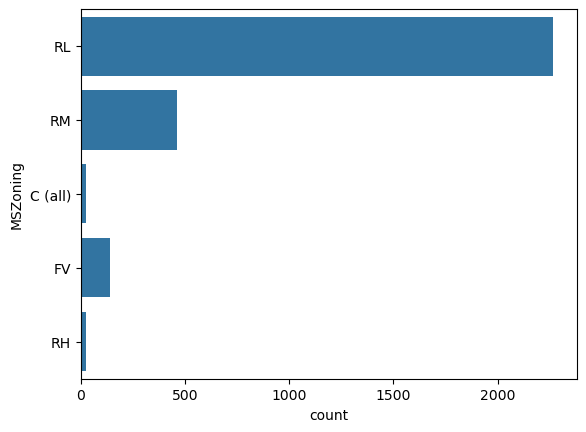

In [31]:
sns.countplot(df["MSZoning"])


In [32]:
df["MSZoning"].mode()[0]

'RL'

In [33]:
### copy the data frame and do chnage in this 
df_mvi=df.copy()
df_mvi.shape


(2919, 80)

In [34]:
mszoning_mode=df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan,mszoning_mode,inplace=True)
df_mvi["MSZoning"].isnull().sum()



C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\295992799.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MSZoning"].replace(np.nan,mszoning_mode,inplace=True)


0

<Axes: xlabel='count', ylabel='MSZoning'>

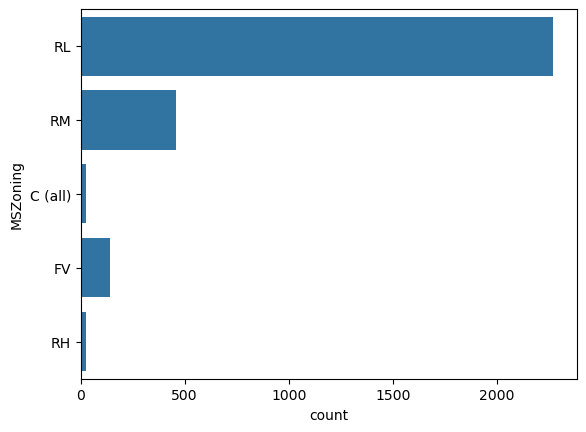

In [35]:
sns.countplot(df_mvi["MSZoning"])

In [36]:
def oldNewCountPlot(df,df_mvi,feature):
    plt.subplot(121)
    sns.countplot(df["MSZoning"])
    plt.title("old data Distribution")
    plt.subplot(122)
    sns.countplot(df_mvi["MSZoning"])
    plt.title("new data Distribution")

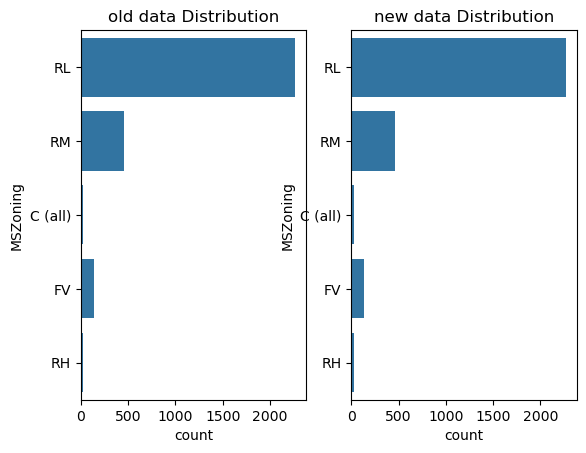

In [37]:
oldNewCountPlot(df,df_mvi,"MSZoning")

## handling Alley =   93.216855

In [38]:
df["Alley"].value_counts()


Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [39]:
alley_cont="NA"
df_mvi["Alley"].replace(np.nan, alley_cont , inplace=True)
df_mvi["Alley"].isnull().sum()


C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\2998119206.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Alley"].replace(np.nan, alley_cont , inplace=True)


0

In [40]:
def oldNewCountPlot(df,df_mvi,feature):
    plt.subplot(121)
    sns.countplot(df["Alley"])
    plt.title("old data Distribution")
    plt.subplot(122)
    sns.countplot(df_mvi["Alley"])
    plt.title("new data Distribution")

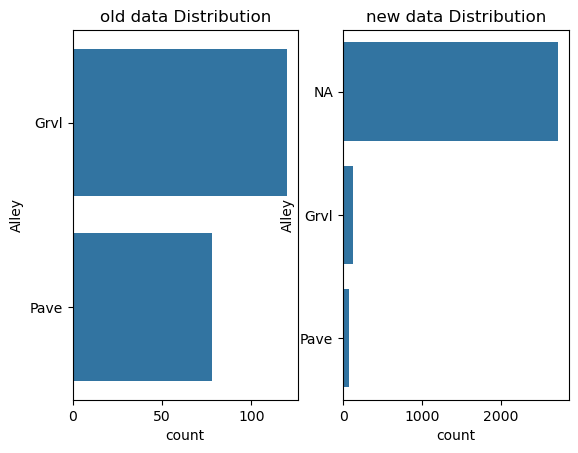

In [41]:
 oldNewCountPlot(df,df_mvi,"Alley")



## Handling LotFrontage = 16.649538

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\69973832.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


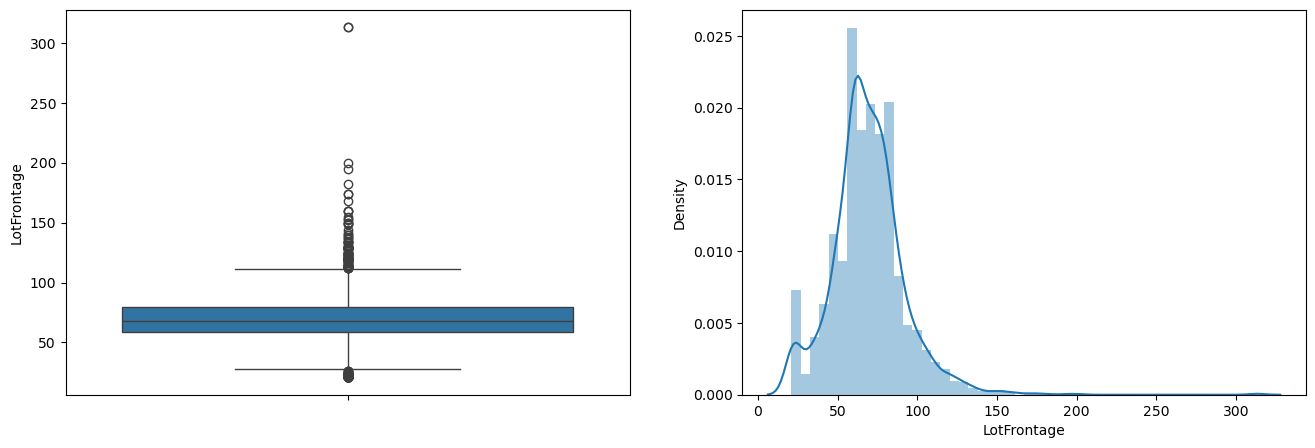

In [42]:
def boxHistPlot(df, figsize=(16,5)):
 plt.figure(figsize = figsize)
 plt.subplot(121)
 sns.boxplot(df)
 plt.subplot(122)
 sns.distplot(df) 

boxHistPlot(df["LotFrontage"])


In [43]:
lotfrontage_median = df["LotFrontage"].median()
lotfrontage_median

68.0

In [44]:
lotfrontage_median = df["LotFrontage"].median()
df_mvi["LotFrontage"].replace(np.nan,lotfrontage_median,inplace=True)
df_mvi["LotFrontage"].isnull().sum()

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\832161039.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["LotFrontage"].replace(np.nan,lotfrontage_median,inplace=True)


0

In [45]:
def oldNewBoxHistPlot(df,df_mvi,Feature,figsize=(16,10)):
    plt.figure(figsize=figsize)
    plt.subplot(221)
    sns.boxplot(df[Feature])
    plt.title("Old data Distribution")
    plt.subplot(222)
    sns.distplot(df[Feature])
    plt.title("OLd data Distribution")

    plt.subplot(223)
    sns.boxplot(df_mvi[Feature])
    plt.title("New data Distribution")
    plt.subplot(224)
    sns.distplot(df_mvi[Feature])
    plt.title("New data Distribution")

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\199582411.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[Feature])
C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\199582411.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_mvi[Feature])


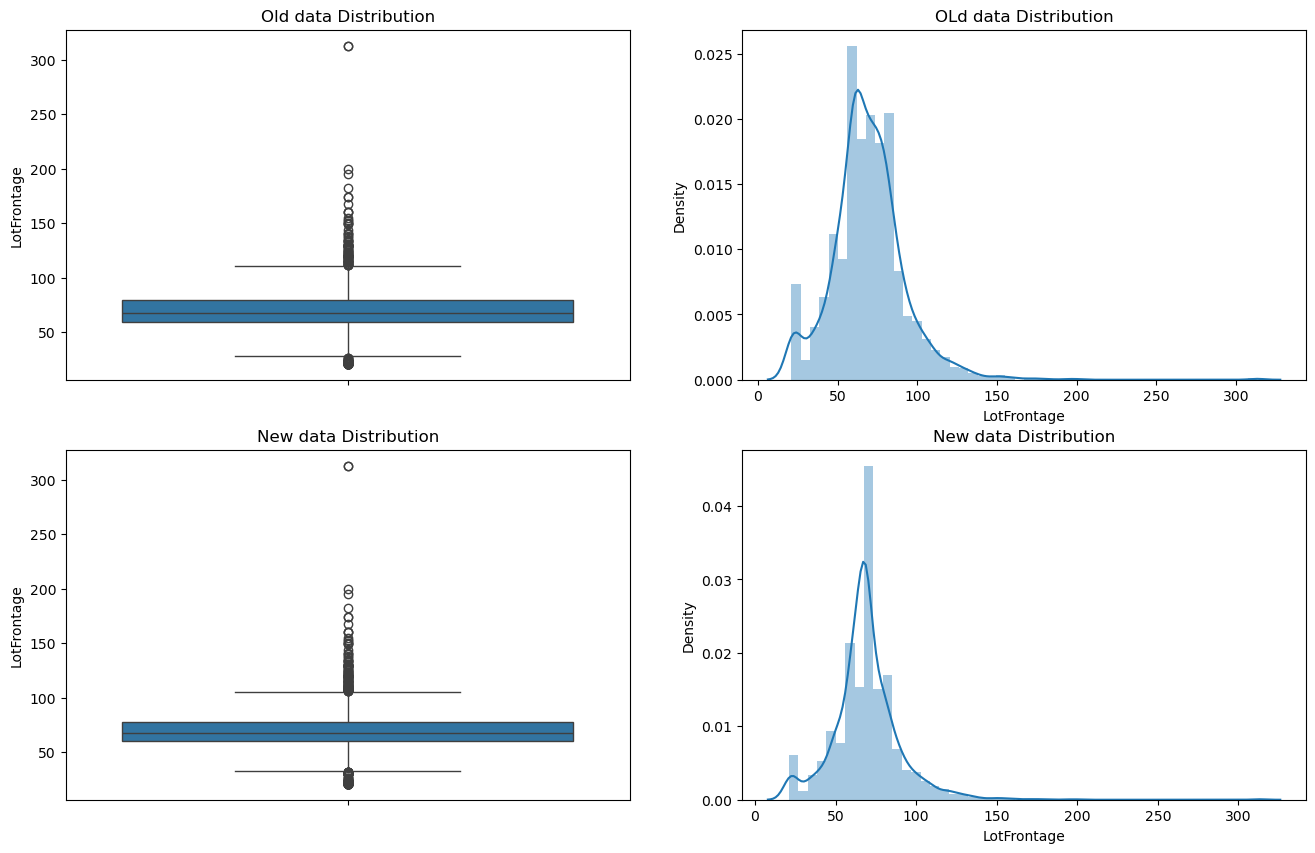

In [46]:

oldNewBoxHistPlot(df,df_mvi,"LotFrontage")

## Handling Utilities =  0.068517

In [47]:
df["Utilities"].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [48]:
utilities_mode = df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan,utilities_mode,inplace=True)
df_mvi["Utilities"].isnull().sum()

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\534134289.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Utilities"].replace(np.nan,utilities_mode,inplace=True)


0

## Handling Exterior1st = 0.034258

In [49]:
df["Exterior1st"].value_counts()


Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [50]:
exterior1st_mode = df["Exterior1st"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan,exterior1st_mode, inplace =True)
df_mvi["Exterior1st"].isnull().sum()

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\2841067410.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior1st"].replace(np.nan,exterior1st_mode, inplace =True)


0

## handling Exterior2nd = 0.034258

In [51]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [52]:
exterior2nd_mode = df["Exterior2nd"].mode()[0]
df_mvi["Exterior2nd"].replace(np.nan,exterior2nd_mode,inplace =True)
df_mvi["Exterior2nd"].isnull().sum()

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\1902489390.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior2nd"].replace(np.nan,exterior2nd_mode,inplace =True)


0

## handling MasVnrType = 60.500171 & MasVnrArea = 0.787941

In [53]:
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [54]:
df["MasVnrArea"].value_counts()

MasVnrArea
0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
137.0       1
274.0       1
415.0       1
760.0       1
382.0       1
Name: count, Length: 444, dtype: int64

In [55]:
masvnrtype_mode="None"
df_mvi["MasVnrType"].replace(np.nan,masvnrtype_mode,inplace=True)
df_mvi["MasVnrType"].isnull().sum()

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\3441524176.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrType"].replace(np.nan,masvnrtype_mode,inplace=True)


0

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\69973832.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


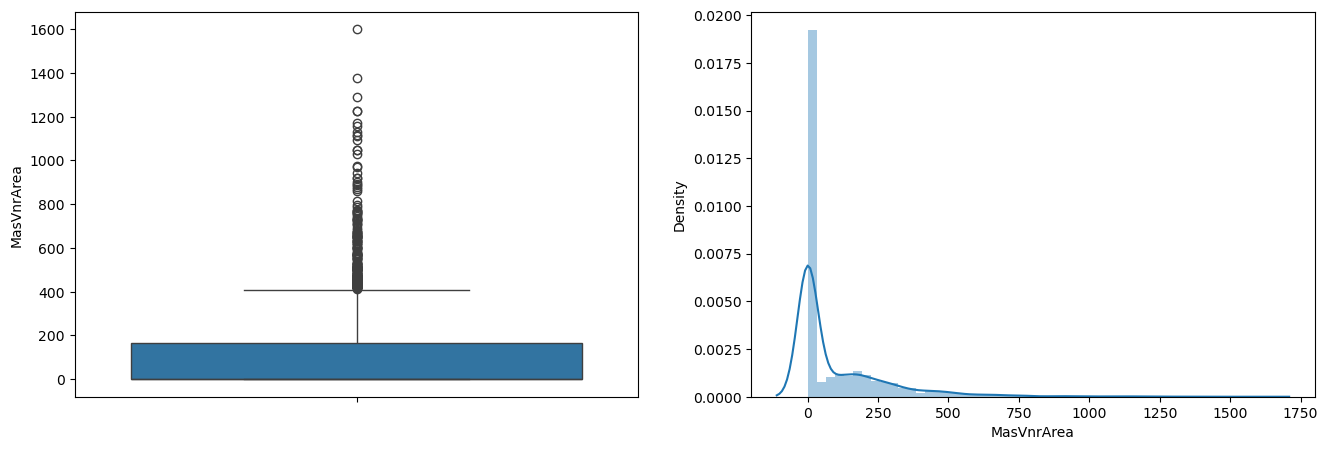

In [56]:
boxHistPlot(df["MasVnrArea"])

In [57]:
masvnrarea_cont=0
df_mvi["MasVnrArea"].replace(np.nan,masvnrarea_cont,inplace = True)
df_mvi["MasVnrArea"].isnull().sum()

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\1993073742.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrArea"].replace(np.nan,masvnrarea_cont,inplace = True)


0

## Handling Bsmt Features

In [58]:
cat_bsmt_features=["BsmtQual",
"BsmtCond",      
"BsmtExposure",    
"BsmtFinType1",     
"BsmtFinType2"] 
num_bsmt_features=["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath"]

<Axes: ylabel='Id'>

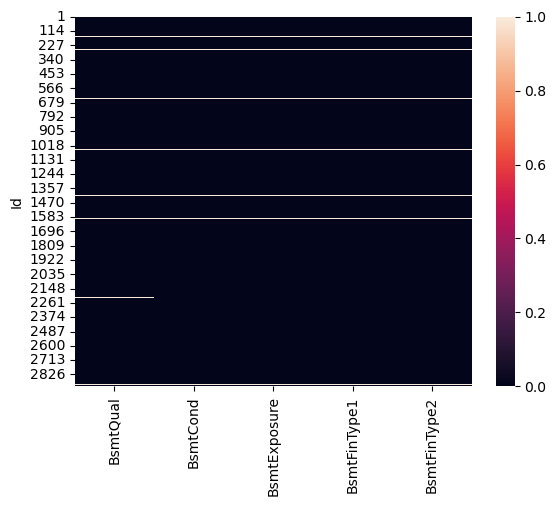

In [59]:
sns.heatmap(df[cat_bsmt_features].isnull())

In [60]:
for feat in cat_bsmt_features:
    print(f"value count of {feat}:{df[feat].value_counts()}")

value count of BsmtQual:BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
value count of BsmtCond:BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
value count of BsmtExposure:BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
value count of BsmtFinType1:BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
value count of BsmtFinType2:BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [61]:
bsmt_cont = "NA" 
for feat in cat_bsmt_features:
    df_mvi[feat].replace(np.nan,bsmt_cont,inplace =True) 
   

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\3422188776.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,bsmt_cont,inplace =True)


In [62]:
df_mvi[cat_bsmt_features].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [63]:

for feat in num_bsmt_features:
    print(f"value count of {feat}:{df[feat].value_counts()}")

value count of BsmtFinSF1:BsmtFinSF1
0.0       929
24.0       27
16.0       14
300.0       9
288.0       8
         ... 
383.0       1
1085.0      1
900.0       1
1022.0      1
337.0       1
Name: count, Length: 991, dtype: int64
value count of BsmtFinSF2:BsmtFinSF2
0.0       2571
180.0        5
294.0        5
435.0        3
483.0        3
          ... 
600.0        1
211.0        1
1031.0       1
438.0        1
297.0        1
Name: count, Length: 272, dtype: int64
value count of BsmtUnfSF:BsmtUnfSF
0.0       241
384.0      19
728.0      14
672.0      13
600.0      12
         ... 
257.0       1
1217.0      1
539.0       1
39.0        1
1503.0      1
Name: count, Length: 1135, dtype: int64
value count of TotalBsmtSF:TotalBsmtSF
0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
1571.0     1
2633.0     1
757.0      1
873.0      1
1381.0     1
Name: count, Length: 1058, dtype: int64
value count of BsmtFullBath:BsmtFullBath
0.0    1705
1.0    1172
2.0      38
3

In [64]:
bsmt_zero=0
for feat in num_bsmt_features:
    df_mvi[feat].replace(np.nan,bsmt_zero,inplace=True)

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\4241832974.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,bsmt_zero,inplace=True)


In [65]:
df_mvi[num_bsmt_features].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

## Hanling Electrical = 0.034258 & KitchenQual = 0.034258

In [66]:
df["Electrical"].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [67]:
df["KitchenQual"].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [68]:
electrical_mode = df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan,electrical_mode,inplace=True)
df_mvi["Electrical"].isnull().sum()

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\3359522811.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Electrical"].replace(np.nan,electrical_mode,inplace=True)


0

In [69]:
kitchenqual_mode = df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan,kitchenqual_mode,inplace=True)
df_mvi["KitchenQual"].isnull().sum()

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\3134662427.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["KitchenQual"].replace(np.nan,kitchenqual_mode,inplace=True)


0

## Handling Functional = 0.068517

In [70]:
df["Functional"].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [71]:
functional_mode = df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan,functional_mode,inplace=True)
df_mvi["Functional"].isnull().sum()

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\305559294.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Functional"].replace(np.nan,functional_mode,inplace=True)


0

In [72]:
cat_feat = ["FireplaceQu","PoolQC","Fence","MiscFeature"]

for feat in cat_feat:
    print(f"Value counts of {feat}:{df[feat].value_counts()}")



Value counts of FireplaceQu:FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
Value counts of PoolQC:PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
Value counts of Fence:Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
Value counts of MiscFeature:MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64


In [73]:
fireplacequ_cont = "Na"
df_mvi["FireplaceQu"].replace(np.nan,fireplacequ_cont,inplace=True)
df_mvi["FireplaceQu"].isnull().sum()

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\2363011325.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["FireplaceQu"].replace(np.nan,fireplacequ_cont,inplace=True)


0

In [74]:
poolqc_cont = "Na"
df_mvi["PoolQC"].replace(np.nan,poolqc_cont,inplace=True)
df_mvi["PoolQC"].isnull().sum()

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\4026005657.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["PoolQC"].replace(np.nan,poolqc_cont,inplace=True)


0

In [75]:
fence_cont = "Na"
df_mvi["Fence"].replace(np.nan,fence_cont,inplace=True)
df_mvi["Fence"].isnull().sum()

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\2595507037.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Fence"].replace(np.nan,fence_cont,inplace=True)


0

In [76]:
miscfeature_cont = "Na"
df_mvi["MiscFeature"].replace(np.nan,miscfeature_cont,inplace=True)
df_mvi["MiscFeature"].isnull().sum()

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\3297618259.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MiscFeature"].replace(np.nan,miscfeature_cont,inplace=True)


0

In [77]:
df["SaleType"].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [78]:
saletype_mode= df["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan,saletype_mode,inplace=True)
df_mvi["SaleType"].isnull().sum()

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\4170384786.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["SaleType"].replace(np.nan,saletype_mode,inplace=True)


0

## handling garage related features


In [79]:
cat_gar_feature =["GarageType","GarageQual","GarageFinish","GarageCond"]
num_gar_feature =["GarageCars", "GarageArea","GarageYrBlt"]

df_garafe = df[num_gar_feature + cat_gar_feature]
df_garafe[df_garafe.isnull().any(axis=1)]

,GarageCars,GarageArea,GarageYrBlt,GarageType,GarageQual,GarageFinish,GarageCond
Id,,,,,,,
40,0.0,0.0,NaN,NaN,NaN,NaN,NaN
49,0.0,0.0,NaN,NaN,NaN,NaN,NaN
79,0.0,0.0,NaN,NaN,NaN,NaN,NaN
89,0.0,0.0,NaN,NaN,NaN,NaN,NaN
90,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2894,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2910,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2914,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [80]:
for feat in num_gar_feature:
    print(f"value of counts {feat}:{df[feat].value_counts()}")

value of counts GarageCars:GarageCars
2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: count, dtype: int64
value of counts GarageArea:GarageArea
0.0       157
576.0      97
440.0      96
240.0      69
484.0      68
         ... 
872.0       1
923.0       1
192.0       1
1025.0      1
272.0       1
Name: count, Length: 603, dtype: int64
value of counts GarageYrBlt:GarageYrBlt
2005.0    142
2006.0    115
2007.0    115
2004.0     99
2003.0     92
         ... 
1908.0      1
1896.0      1
1933.0      1
1906.0      1
1919.0      1
Name: count, Length: 103, dtype: int64


In [92]:
gar_zero = 0
for feat in num_gar_feature:
    df_mvi[feat].replace(np.nan, gar_zero , inplace=True)

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\483475599.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, gar_zero , inplace=True)


In [93]:
df_mvi[num_gar_feature].isnull().sum()

GarageCars     0
GarageArea     0
GarageYrBlt    0
dtype: int64

In [94]:
for feat in cat_gar_feature:
    print(f"Value of counts {feat}:{df[feat].value_counts()}")

Value of counts GarageType:GarageType
Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64
Value of counts GarageQual:GarageQual
TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: count, dtype: int64
Value of counts GarageFinish:GarageFinish
Unf    1230
RFn     811
Fin     719
Name: count, dtype: int64
Value of counts GarageCond:GarageCond
TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: count, dtype: int64


In [95]:
gar_cont = "NA"
for feat in cat_gar_feature:
    df_mvi[feat].replace(np.nan,gar_cont,inplace=True)

C:\Users\Paras\AppData\Local\Temp\ipykernel_14860\3898048257.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,gar_cont,inplace=True)


In [96]:
df_mvi[cat_gar_feature].isnull().sum()

GarageType      0
GarageQual      0
GarageFinish    0
GarageCond      0
dtype: int64

In [97]:
df_mvi.isnull().any(axis=1).sum()

1459

##  Feature Transformation
### Convert Numerical Feature to categorical feature

In [98]:
for_num_con =["MSSubClass","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
for feat in for_num_con:
    print(f"{feat} : data type = {df_mvi[feat].dtype}")

MSSubClass : data type = int64
YearBuilt : data type = int64
YearRemodAdd : data type = int64
GarageYrBlt : data type = float64
MoSold : data type = int64
YrSold : data type = int64


In [99]:
df_mvi[for_num_con].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [100]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [101]:
### mapping the unique value with month of calender for this we have to import calender library


In [102]:
calendar.month_abbr[12]

'Dec'

In [103]:
df_mvi["MoSold"] = df_mvi["MoSold"].apply(lambda x: calendar.month_abbr[x])
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [104]:
for feat in for_num_con:
    df_mvi[feat] = df_mvi[feat].astype(str)

In [105]:
for_num_con =["MSSubClass","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
for feat in for_num_con:
    print(f"{feat} : data type = {df_mvi[feat].dtype}")

MSSubClass : data type = object
YearBuilt : data type = object
YearRemodAdd : data type = object
GarageYrBlt : data type = object
MoSold : data type = object
YrSold : data type = object


In [106]:
###Convert categorical feature into numerical feature conversion 

In [107]:
ordinal_end_var =[
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinSF1",
    "BsmtFinType2",
    "HeatingQC",
    "KitchenQual",
    "FireplaceQu",
    "GarageQual",
    "GarageCond",
    "PoolQc",
    "Functional",
    "GarageFinish",
    "PavedDrive",
    "Utilities" ]
print("Total no of feature convert to ordinal to numerical", len(ordinal_end_var))

Total no of feature convert to ordinal to numerical 18


In [108]:
df_mvi["ExterQual"].value_counts()


ExterQual
TA    1798
Gd     979
Ex     107
Fa      35
Name: count, dtype: int64

In [109]:
df_mvi["ExterQual"]=df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"], ordered=True)).cat.codes

In [110]:
df_mvi["ExterQual"].value_counts()

ExterQual
2    1798
3     979
4     107
1      35
Name: count, dtype: int64

In [111]:
df_mvi["BsmtExposure"].value_counts()

BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
NA      82
Name: count, dtype: int64

In [112]:
df_mvi["BsmtExposure"]=df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["NA","No","Mn", "Av", "Gd"], ordered=True)).cat.codes 

In [113]:
df_mvi["BsmtExposure"].value_counts()

BsmtExposure
1    1904
3     418
4     276
2     239
0      82
Name: count, dtype: int64

In [114]:
df_mvi["ExterCond"] = df_mvi["ExterCond"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["BsmtQual"] = df_mvi["BsmtQual"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["BsmtCond"] = df_mvi["BsmtCond"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["BsmtFinType1"] = df_mvi["BsmtFinType1"].astype(CategoricalDtype(categories=["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], ordered=True)).cat.codes
df_mvi["BsmtFinType2"] = df_mvi["BsmtFinType2"].astype(CategoricalDtype(categories=["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], ordered=True)).cat.codes
df_mvi["HeatingQC"] = df_mvi["HeatingQC"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["KitchenQual"] = df_mvi["KitchenQual"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["FireplaceQu"] = df_mvi["FireplaceQu"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["GarageQual"] = df_mvi["GarageQual"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["GarageCond"] = df_mvi["GarageCond"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["PoolQC"] = df_mvi["PoolQC"].astype(CategoricalDtype(categories=["NA", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["Functional"] = df_mvi["Functional"].astype(CategoricalDtype(categories=["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"], ordered=True)).cat.codes
df_mvi["GarageFinish"] = df_mvi["GarageFinish"].astype(CategoricalDtype(categories=["NA", "Unf", "RFn", "Fin"], ordered=True)).cat.codes
df_mvi["PavedDrive"] = df_mvi["PavedDrive"].astype(CategoricalDtype(categories=["N", "P", "Y"], ordered=True)).cat.codes
df_mvi["Utilities"] = df_mvi["Utilities"].astype(CategoricalDtype(categories=["ELO", "NoSeWa", "NoSewr", "AllPub"], ordered=True)).cat.codes


In [115]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

## One Hot Encoding For Nominal Categorical Data 

In [116]:
df_encod = df_mvi.copy()
object_features=df_encod.select_dtypes(include="object").columns.tolist()
print("Total object data type features : ", len(object_features))
print("Features: \n" , object_features)

Total object data type features :  32
Features: 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [117]:
df_encod[object_features].head(2)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,GarageYrBlt,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,2003.0,Na,Na,Feb,2008,WD,Normal
2,20,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Attchd,1976.0,Na,Na,May,2007,WD,Normal


In [118]:
print("Shape of DF before encoding :" ,df_encod.shape)
df_encod = pd.get_dummies(df_encod, columns = object_features , prefix=object_features , drop_first=True)
print("Shape of DF after encoding :" ,df_encod.shape)

Shape of DF before encoding : (2919, 80)
Shape of DF after encoding : (2919, 513)


In [119]:
df_encod.select_dtypes(include="object").columns.tolist()

[]

In [120]:
df_encod.shape

(2919, 513)

In [121]:
len_train = df_train.shape[0]
len_train

1460

In [122]:
x_train=df_encod[:len_train].drop("SalePrice",axis=1)
y_train=df_encod["SalePrice"][:len_train]

x_test=df_encod[len_train:].drop("SalePrice",axis=1)

In [123]:
print("Shape of x_train data : ",x_train.shape)
print("Shape of y_train data : ",y_train.shape)
print("Shape of x_test data : ",x_test.shape)

Shape of x_train data :  (1460, 512)
Shape of y_train data :  (1460,)
Shape of x_test data :  (1459, 512)


## Feature Scaling


In [124]:
sc = StandardScaler()
sc.fit(x_train)
# formula => z = (x-u)/s

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)



In [125]:
x_train[:3,:]

array([[-0.21271975, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.46815755, -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.07654429,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [126]:
x_test[:3,:]

array([[ 0.46815755,  0.11076257,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.51354937,  0.37584985,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.19580663,  0.33205282,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [127]:
# carry forward for deployement
#sc.mean_
#sc.n_features_in_
#sc.n_samples_seen_
#sc.scale_
#sc.var_
#sc.with_mean
#sc.with_std

## Train ML Model

In [129]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   - -------------------------------------- 5.2/150.0 MB 24.5 MB/s eta 0:00:06
   --- ------------------------------------ 11.8/150.0 MB 29.5 MB/s eta 0:00:05
   ---- ----------------------------------- 18.6/150.0 MB 29.4 MB/s eta 0:00:05
   ------ --------------------------------- 23.9/150.0 MB 29.0 MB/s eta 0:00:05
   ------- -------------------------------- 29.6/150.0 MB 28.4 MB/s eta 0:00:05
   --------- ------------------------------ 35.1/150.0 MB 28.2 MB/s eta 0:00:05
   ----------- ---------------------------- 42.5/150.0 MB 29.0 MB/s eta 0:00:04
   ------------- -------------------------- 50.6/150.0 MB 30.1 MB/s eta 0:00:04
   --------------- ------------------------ 58.2/150.0 MB 31.1 MB/s eta 0:00:03
   ----------------- ---------------------- 65.3/150.0 MB 31.5 MB/s eta 0:00:03
   ------------------- -------------------- 74.2/150

In [140]:
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import SGDRegressor 
from sklearn. neighbors import KNeighborsRegressor 
from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network import MLPRegressor 
from xgboost import XGBRegressor

In [141]:
svr = SVR()
lr  = LinearRegression()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()

mlpr = MLPRegressor()
ir = IsotonicRegression()


In [156]:
models = { 
"a": ["LinearRegression", lr], 
"b": ["SVR", svr], 
"c":["SGDRegressor", sgdr], 
"d": ["KNeighbors Regressor", knr], 
"e": ["GaussianProcessRegressor", gpr], 
"f":["Decision Tree Regressor", dtr], 
"g": ["GradientBoosting Regressor", gbr], 
"h":["Random ForestRegressor", rfr], 
"i": ["XGBRegressor", xgbr], 
"j": ["MLPRegressor", mlpr],
}

In [159]:
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.metrics import make_scorer, r2_score 
def test_model(model, x_train=x_train, y_train=y_train): 
   cv=KFold(n_splits = 7, shuffle=True, random_state = 45) 
   r2=make_scorer(r2_score) 
   r2_val_score=cross_val_score (model, x_train, y_train, cv=cv, scoring = r2) 
   score = [r2_val_score.mean()] 
   return score

In [160]:
models_score = [] 
for model in models: 
  print("Training model", models [model][0]) 
  score =test_model(models[model][1], x_train, y_train) 
  print("Score of model", score) 
  models_score.append([models[model][0], score[0]])

Training model LinearRegression
Score of model [-2.790757304336369e+25]
Training model SVR
Score of model [-0.05213358208388895]
Training model SGDRegressor
Score of model [-5187.318227813552]
Training model KNeighbors Regressor
Score of model [0.5585969095634161]
Training model GaussianProcessRegressor
Score of model [-5.3988644348913875]
Training model Decision Tree Regressor
Score of model [0.6786997609267381]
Training model GradientBoosting Regressor
Score of model [0.876099942286537]
Training model Random ForestRegressor
Score of model [0.8456969400766591]
Training model XGBRegressor
Score of model [0.8609859318559222]
Training model MLPRegressor


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Score of model [-4.8324069832084575]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
